In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [12]:
# Daten einlesen
df = pd.read_csv('data.csv')


In [13]:
df.head(5)

,time,ptime,wind_direction,wind_speed,temperature,pressure,power
0,2019-01-01 00:00:00,2018-12-31 06:00:00,293.198308,9.004684,275.698962,103353.718750,2707.0
1,2019-01-01 00:15:00,2018-12-31 06:00:00,292.102529,8.847332,275.636830,103343.753906,2749.0
2,2019-01-01 00:30:00,2018-12-31 06:00:00,291.005947,8.689980,275.574697,103333.789062,2566.0
3,2019-01-01 00:45:00,2018-12-31 06:00:00,289.909365,8.532627,275.512564,103323.824219,2613.0
4,2019-01-01 01:00:00,2018-12-31 06:00:00,288.813586,8.375275,275.450431,103313.859375,2602.0


In [14]:
# Find the number of missing values for each column
missing_values = df.isnull().sum()
missing_values

time                 0
ptime                0
wind_direction       0
wind_speed           0
temperature        576
pressure           576
power             3658
dtype: int64

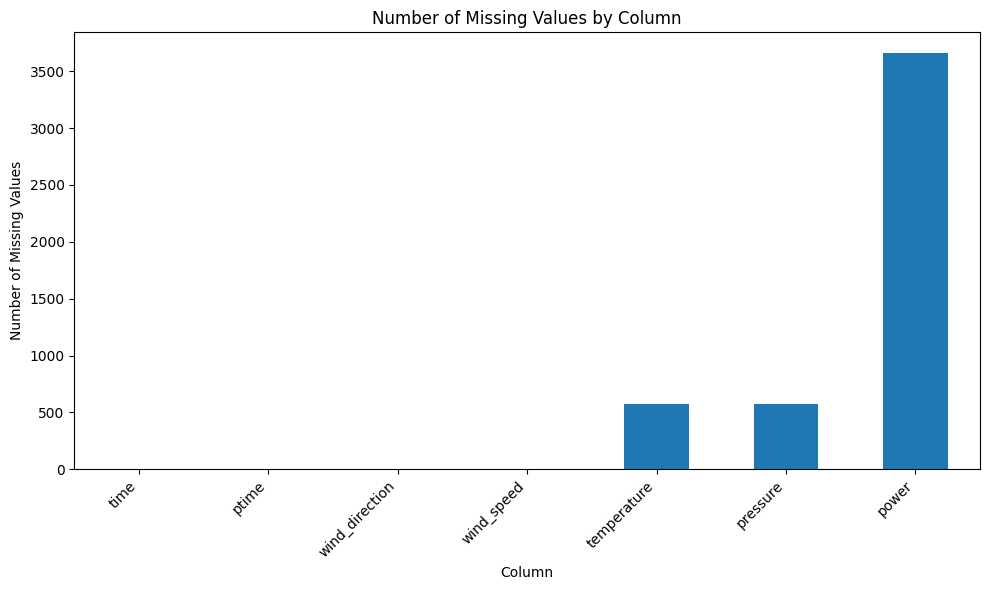

In [15]:
# Create a bar plot of missing values
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Number of Missing Values by Column')
plt.xlabel('Column')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

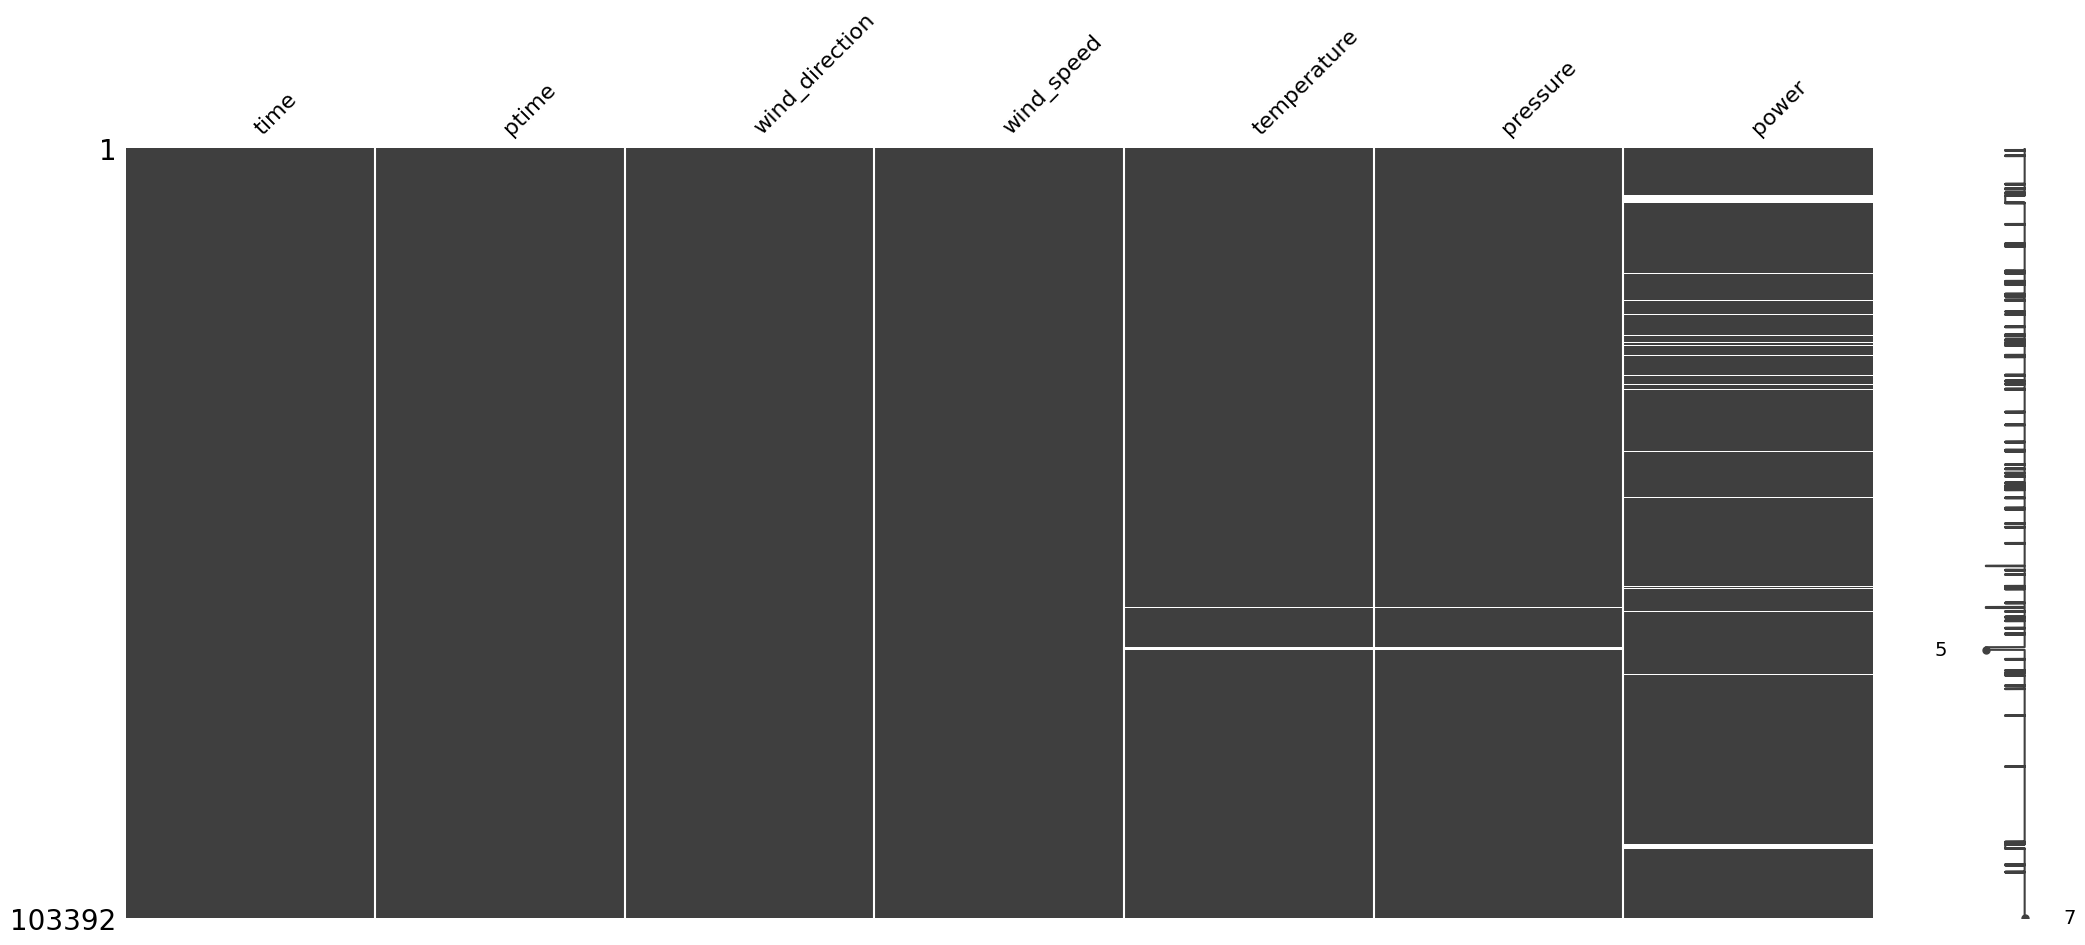

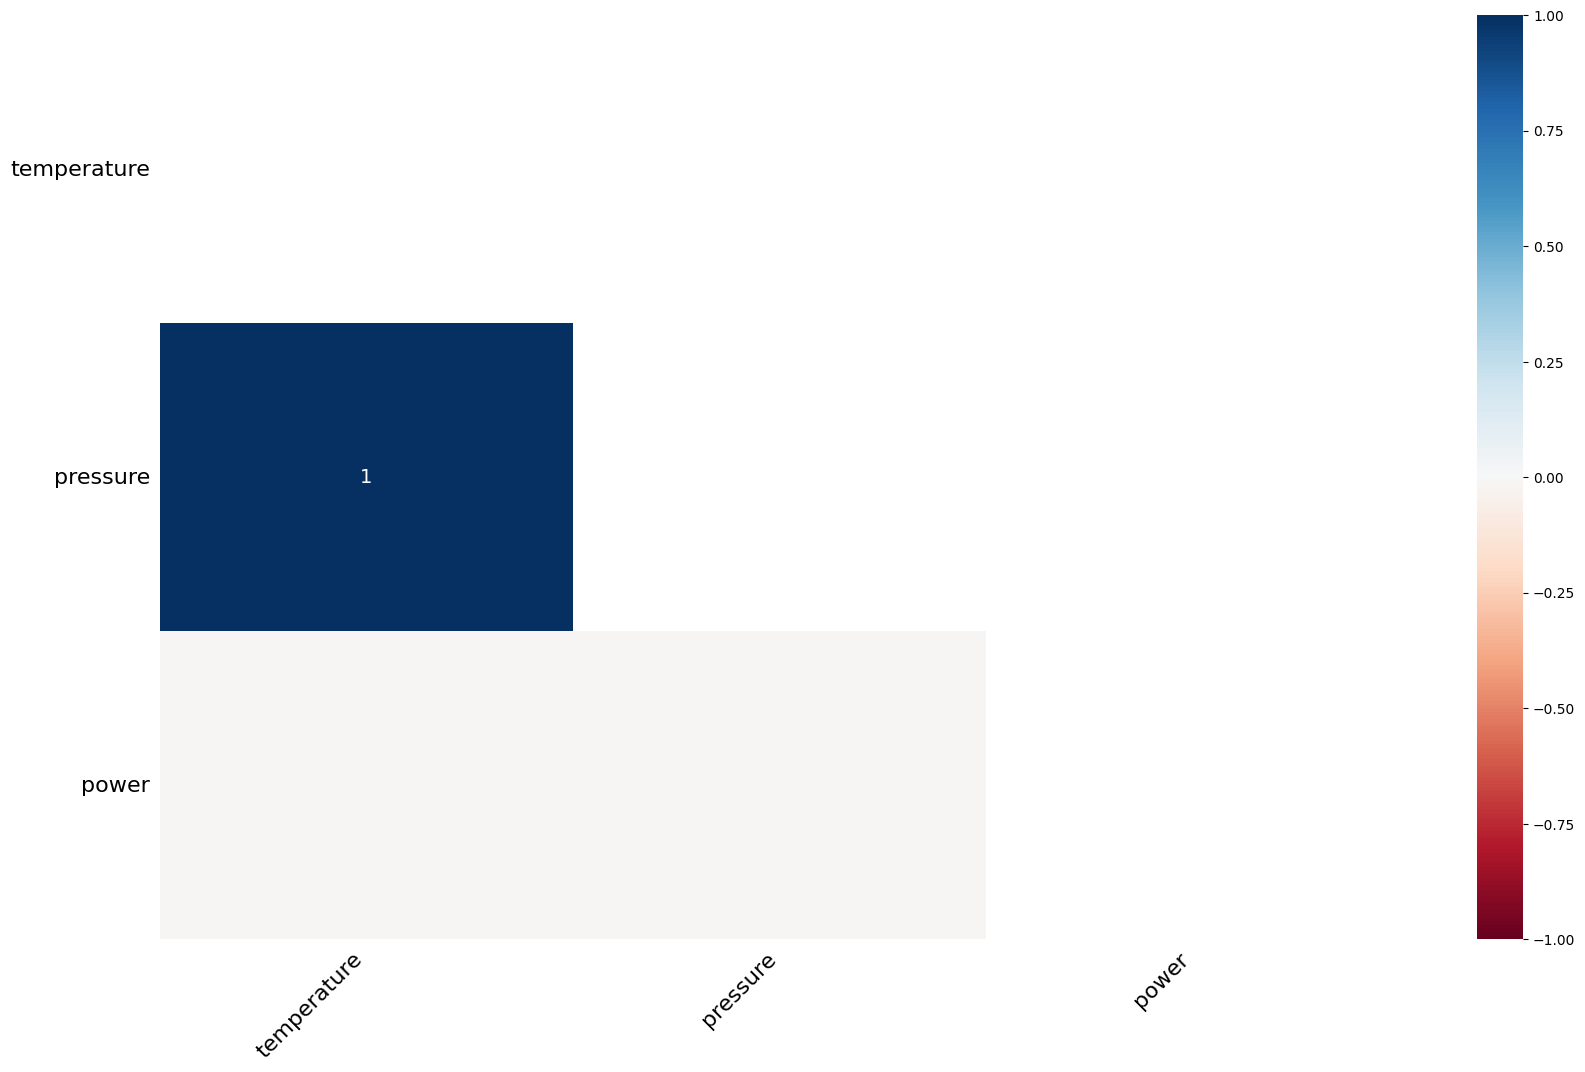

In [16]:
msno.matrix(df)  # df is your DataFrame
plt.show()

msno.heatmap(df)
plt.show()

 Checking for Randomness of Missing Values

There are several ways to investigate if missing values are randomly distributed (Missing Completely At Random - MCAR, or Missing At Random - MAR). Here are a few approaches:

Missingness Patterns:

Concept: Look for patterns in which columns have missing values together. If certain columns are more likely to have missing values when other columns are also missing, this suggests a dependency and non-randomness.

Method: You can use a missingness matrix or visualize missing data patterns using libraries like missingno in Python.

---> It is clear from the visualisation that pressure and temperature missing data is notat random. I thinink impuattion as a mean or median not be  a perfect method. 

Forward or Backward Fill (Time Series): Given that this is time series data, forward or backward fill (using the previous or next valid value) is often a suitable approach. This preserves the temporal continuity of the data.--> I have preffered it. 

If your data has a high frequency (e.g., measurements every few minutes), interpolation might be more accurate because there are more data points to estimate between.
If the data has a lower frequency (e.g., hourly), forward/backward fill might be sufficient.--> As  the data seems high frequency , I have prefreded the interpolatin technique rathe than forward or backword fill

1. "power" Column (Target Variable):

Logic:
Since "power" is the target variable, missing values here represent instances where you do not have the actual power output.
Imputing these values with estimated values can introduce significant bias, especially given the large number of missing values.
Removing rows with missing "power" values is often the most straightforward approach when preparing data for supervised learning, as it ensures the model is trained only on complete target data.
Recommendation:
For Analysis and Initial Exploration: If the goal is to understand the overall trends and patterns in the data (as per your task), you might choose to temporarily remove rows with missing "power" values for certain analyses.
For Model Training: If this data were to be used for model training, removing the rows with missing "power" values would be the best option.
Investigate the cause: It is very important to try to find the root cause of the missing values. It could be sensor malfunction, communication problems, or other issues.
Background:
In supervised learning, the model learns the relationship between input features and the target variable. If the target variable is missing, the model cannot learn from those instances.
Imputation can distort the true distribution of the target variable, leading to inaccurate model predictions.

In [17]:
# Remove rows with missing "power" values
df_cleaned = df.dropna(subset=['power'])

# Impute missing "temperature" values using interpolation
df_cleaned['temperature'].interpolate(inplace=True) # Data is linearly interpolated

# Impute missing "pressure" values using interpolation
df_cleaned['pressure'].interpolate(inplace=True) # Data is linearly interpolated

# Verify that missing values are handled
print(df_cleaned.isnull().sum())

time              0
ptime             0
wind_direction    0
wind_speed        0
temperature       0
pressure          0
power             0
dtype: int64


/tmp/ipykernel_7713/4250698448.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['temperature'].interpolate(inplace=True) # Data is linearly interpolated
/tmp/ipykernel_7713/4250698448.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['temperature'].interpolate(inplace=True) # Data is linearly interpolated
/tmp/ipyker

In [18]:
df_cleaned.head(20)

,time,ptime,wind_direction,wind_speed,temperature,pressure,power
0,2019-01-01 00:00:00,2018-12-31 06:00:00,293.198308,9.004684,275.698962,103353.718750,2707.0
1,2019-01-01 00:15:00,2018-12-31 06:00:00,292.102529,8.847332,275.636830,103343.753906,2749.0
2,2019-01-01 00:30:00,2018-12-31 06:00:00,291.005947,8.689980,275.574697,103333.789062,2566.0
3,2019-01-01 00:45:00,2018-12-31 06:00:00,289.909365,8.532627,275.512564,103323.824219,2613.0
4,2019-01-01 01:00:00,2018-12-31 06:00:00,288.813586,8.375275,275.450431,103313.859375,2602.0
5,2019-01-01 01:15:00,2018-12-31 06:00:00,287.874963,8.254718,275.388298,103318.050781,2563.0
6,2019-01-01 01:30:00,2018-12-31 06:00:00,286.935835,8.134161,275.326165,103322.242188,2465.0
7,2019-01-01 01:45:00,2018-12-31 06:00:00,285.996708,8.013604,275.264032,103326.433594,2423.0
8,2019-01-01 02:00:00,2018-12-31 06:00:00,285.058085,7.893047,275.201899,103330.625000,2509.0
9,2019-01-01 02:15:00,2018-12-31 06:00:00,283.918027,7.790310,275.139767,103310.730469,2061.0


In [19]:
df_cleaned.tail(5)

,time,ptime,wind_direction,wind_speed,temperature,pressure,power
103387,2019-12-31 22:45:00,2019-12-31 12:00:00,131.056456,2.046687,274.945604,103658.873047,0.0
103388,2019-12-31 23:00:00,2019-12-31 12:00:00,136.345473,1.992634,274.907871,103654.351562,0.0
103389,2019-12-31 23:15:00,2019-12-31 12:00:00,135.323173,1.998156,274.859759,103645.464844,0.0
103390,2019-12-31 23:30:00,2019-12-31 12:00:00,134.300220,2.003677,274.811647,103636.578125,0.0
103391,2019-12-31 23:45:00,2019-12-31 12:00:00,133.277268,2.009199,274.763535,103627.691406,0.0


In [20]:
print(df_cleaned.dtypes)


time               object
ptime              object
wind_direction    float64
wind_speed        float64
temperature       float64
pressure          float64
power             float64
dtype: object


In [21]:
df_cleaned['ptime'] = pd.to_datetime(df_cleaned['ptime'], errors='coerce')


/tmp/ipykernel_7713/4285043926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['ptime'] = pd.to_datetime(df_cleaned['ptime'], errors='coerce')


In [22]:
# Assuming your DataFrame is named df_cleaned
df_cleaned["time"] = pd.to_datetime(df_cleaned["time"]) 

# Set time as index
df_cleaned.set_index("time", inplace=True)

# Resample data to 1-hour intervals, taking the mean
df_hourly = df_cleaned.resample("1D").mean()

# Reset index to make 'time' a column again
df_hourly.reset_index(inplace=True)

# Display the first few rows
print(df_hourly.head())

        time                         ptime  wind_direction  wind_speed  \
0 2019-01-01 2018-12-31 21:00:00.000000000      275.533202   11.588646   
1 2019-01-02 2019-01-01 21:55:51.724137728      313.469128   11.976036   
2 2019-01-03 2019-01-02 21:00:00.000000000      304.501917    7.583021   
3 2019-01-04 2019-01-03 20:54:11.612903168      292.984274    8.612425   
4 2019-01-05 2019-01-04 21:00:00.000000000      284.051267   13.691578   

   temperature       pressure        power  
0   274.931052  102829.531942  7507.229167  
1   271.585685  103019.157560  8522.229885  
2   269.449376  103671.525472  5151.031250  
3   270.506826  103472.493581  5588.365591  
4   272.621980  102751.132216  8727.739583  


/tmp/ipykernel_7713/150328676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["time"] = pd.to_datetime(df_cleaned["time"])


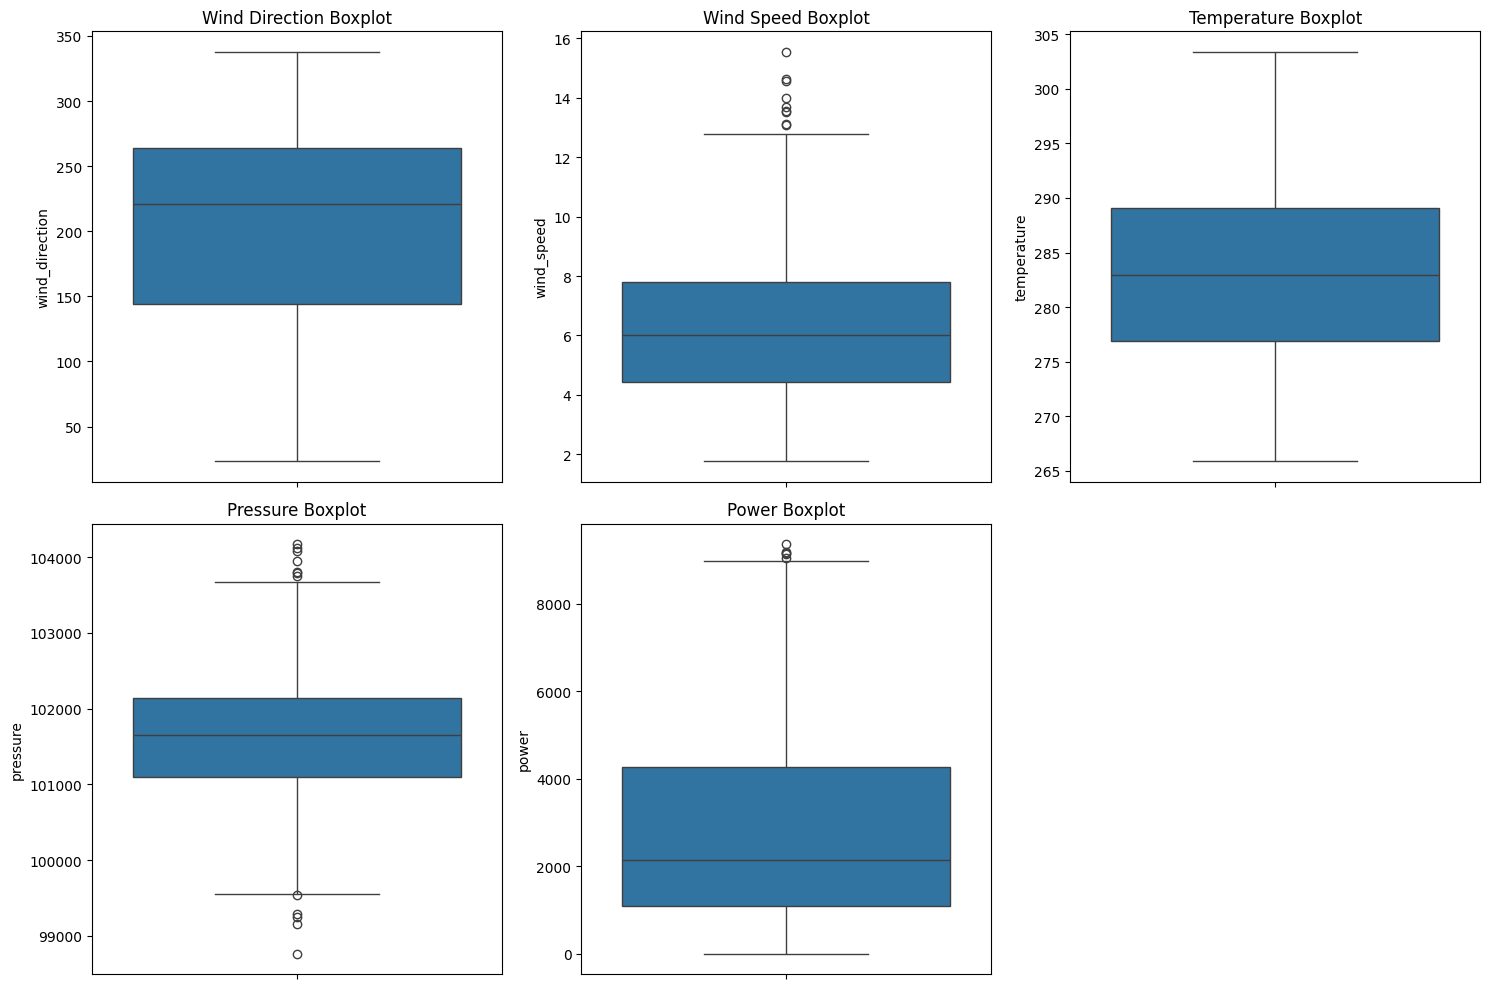

In [23]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.boxplot(y=df_hourly['wind_direction'])
plt.title('Wind Direction Boxplot')

plt.subplot(2, 3, 2)
sns.boxplot(y=df_hourly['wind_speed'])
plt.title('Wind Speed Boxplot')

plt.subplot(2, 3, 3)
sns.boxplot(y=df_hourly['temperature'])
plt.title('Temperature Boxplot')

plt.subplot(2, 3, 4)
sns.boxplot(y=df_hourly['pressure'])
plt.title('Pressure Boxplot')

plt.subplot(2, 3, 5)
sns.boxplot(y=df_hourly['power'])
plt.title('Power Boxplot')

plt.tight_layout()
plt.show()

Outlier Analysis:
Wind Speed Outliers: 9 (2.47%)
Pressure Outliers: 12 (3.29%)
Power Outliers: 5 (1.37%)
Number of power and wind speed outliers that share the same index: 2


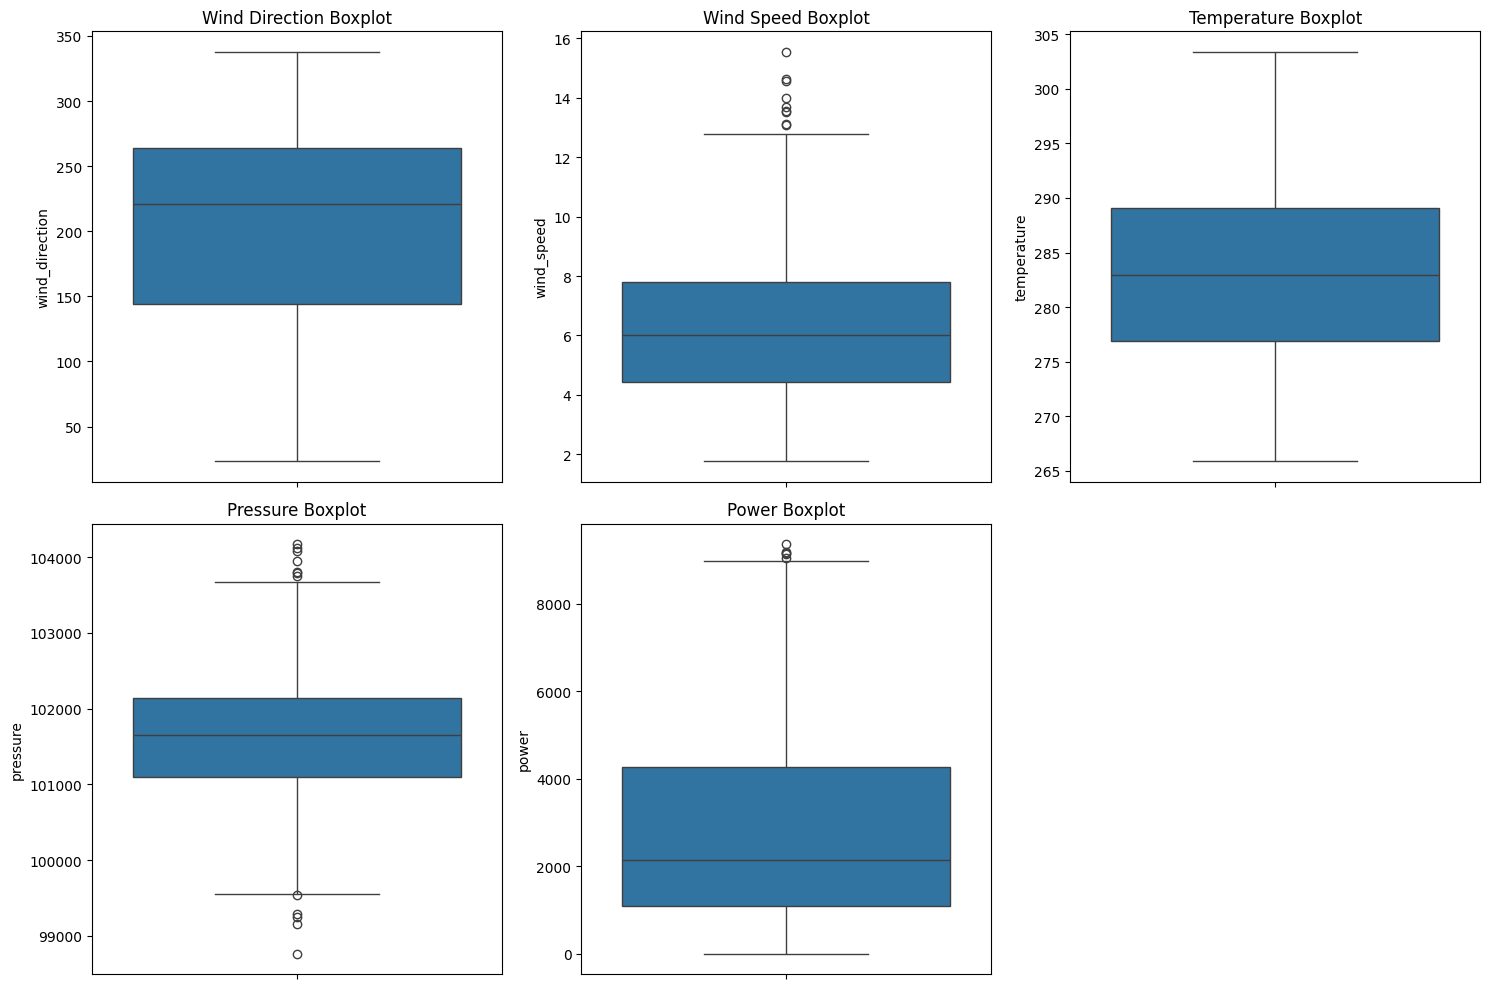

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = df_hourly
df['time'] = pd.to_datetime(df['time'])

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Outlier detection
wind_speed_outliers = detect_outliers_iqr(df, 'wind_speed')
pressure_outliers = detect_outliers_iqr(df, 'pressure')
power_outliers = detect_outliers_iqr(df, 'power')

# Report
print("Outlier Analysis:")
print(f"Wind Speed Outliers: {len(wind_speed_outliers)} ({len(wind_speed_outliers) / len(df) * 100:.2f}%)")
print(f"Pressure Outliers: {len(pressure_outliers)} ({len(pressure_outliers) / len(df) * 100:.2f}%)")
print(f"Power Outliers: {len(power_outliers)} ({len(power_outliers) / len(df) * 100:.2f}%)")

#Example of correlation between power and windspeed outliers.
power_outliers_index = power_outliers.index
wind_speed_outliers_index = wind_speed_outliers.index

common_index = power_outliers_index.intersection(wind_speed_outliers_index)

print(f'Number of power and wind speed outliers that share the same index: {len(common_index)}')

# Box plots (already have these)
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.boxplot(y=df['wind_direction'])
plt.title('Wind Direction Boxplot')

plt.subplot(2, 3, 2)
sns.boxplot(y=df['wind_speed'])
plt.title('Wind Speed Boxplot')

plt.subplot(2, 3, 3)
sns.boxplot(y=df['temperature'])
plt.title('Temperature Boxplot')

plt.subplot(2, 3, 4)
sns.boxplot(y=df['pressure'])
plt.title('Pressure Boxplot')

plt.subplot(2, 3, 5)
sns.boxplot(y=df['power'])
plt.title('Power Boxplot')

plt.tight_layout()
plt.show()

Key Considerations

Documentation is Paramount: Your main job is to document the outliers, explain their potential impact, and suggest handling strategies. You don't need to implement them.
Justification: Always justify your handling suggestions. Why are you suggesting removal, imputation, or transformation?
Potential Impacts: Emphasize how these outliers could affect a power forecast model's accuracy.
Specific Handling Suggestions (For Your Report)

Wind Speed Outliers (9 Outliers, 2.47%)
Potential Causes:
Measurement errors from the anemometer.
Genuine, but rare, extreme wind gusts.
Localized microclimates not representative of the broader wind farm area.
Handling Suggestions (For Your Report):
Capping/Winsorizing: Suggest capping the extreme values at a reasonable threshold (e.g., the 99th percentile). This would reduce the impact of the outliers without removing them entirely.
Transformation: Suggest a logarithmic or square root transformation to reduce the skewness caused by high wind speeds.
Removal: Mention that removal is an option, but it should be done cautiously due to the potential loss of valuable data.
Justification: Explain that handling these outliers is crucial because they could lead to overestimation of power output during high wind events.
Report: Be sure to point out that two of the wind speed outliers share the same index as power outliers. This suggests a direct correlation between these outliers.


Pressure Outliers (12 Outliers, 3.29%)
Potential Causes:
Barometric sensor malfunction.
Sudden, localized pressure changes.
Data entry errors.
Handling Suggestions (For Your Report):
Imputation: Suggest replacing the outliers with the median or mean pressure value. This would preserve the overall data distribution.
Removal: If the outliers are clearly erroneous, suggest removing them.
Justification: Explain that pressure outliers are likely measurement errors and could introduce noise into a model, reducing its accuracy.
Report: Point out that the number of pressure outliers is the highest of all the variables. This could indicate a problem with the pressure sensor or data collection process.


Power Outliers (5 Outliers, 1.37%)
Potential Causes:
Sudden power surges.
Measurement errors from the power meter.
Turbine malfunctions.
Handling Suggestions (For Your Report):
Capping/Winsorizing: Similar to wind speed, suggest capping the extreme power values.
Investigate Corresponding Wind Speeds: Since two of the power outliers also correspond to wind speed outliers, suggest investigating if these high power values are justified by high wind speeds.
Justification: Explain that power outliers could lead to overestimation of overall power production and affect the model's reliability.
Report: Emphasize the importance of correlating power outliers with other variables, especially wind speed, to understand their causes.

In [87]:
df_hourly.head(5)

,time,ptime,wind_direction,wind_speed,temperature,pressure,power
0,2019-01-01,2018-12-31 21:00:00.000000000,275.533202,11.588646,274.931052,102829.531942,7507.229167
1,2019-01-02,2019-01-01 21:55:51.724137728,313.469128,11.976036,271.585685,103019.157560,8522.229885
2,2019-01-03,2019-01-02 21:00:00.000000000,304.501917,7.583021,269.449376,103671.525472,5151.031250
3,2019-01-04,2019-01-03 20:54:11.612903168,292.984274,8.612425,270.506826,103472.493581,5588.365591
4,2019-01-05,2019-01-04 21:00:00.000000000,284.051267,13.691578,272.621980,102751.132216,8727.739583


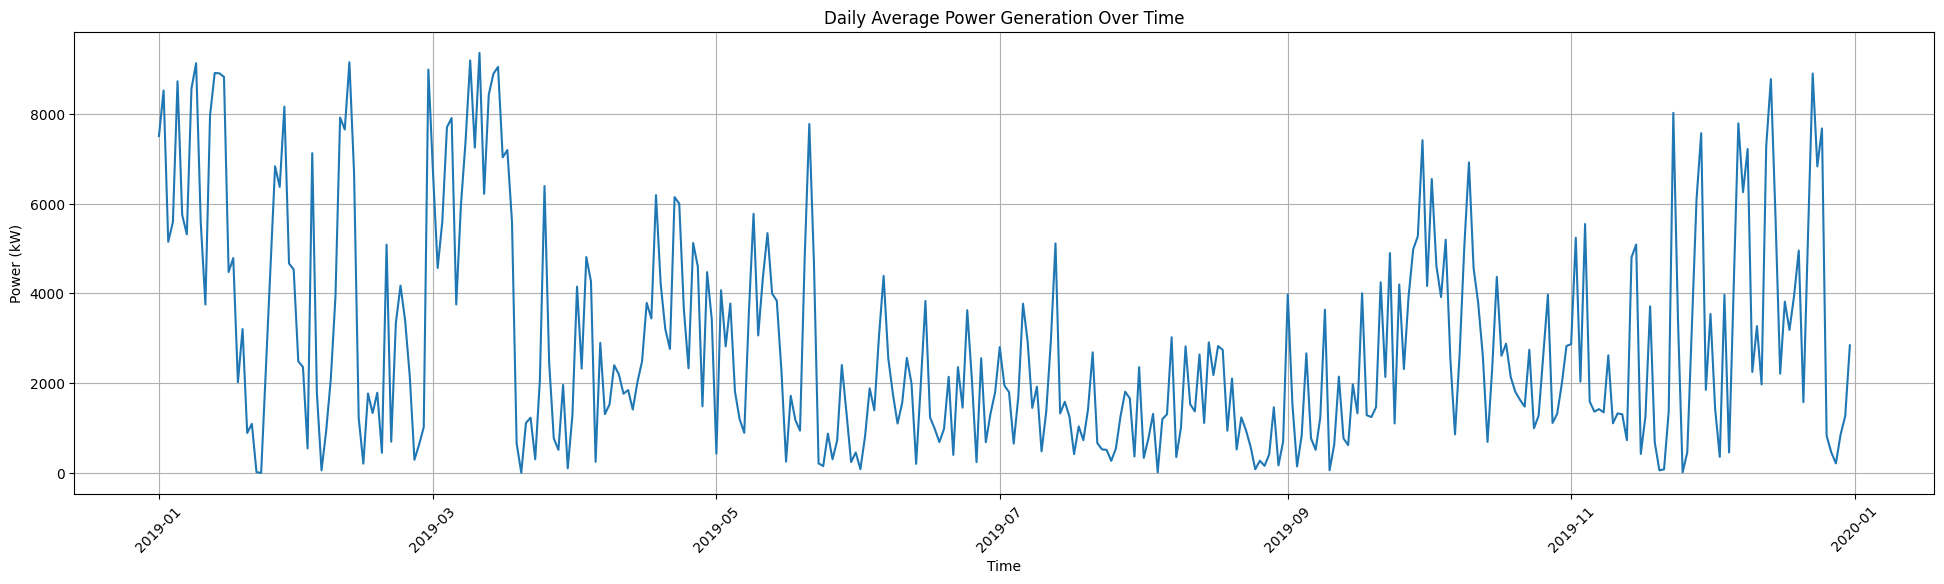

In [88]:
#df_cleaned['time'] = pd.to_datetime(df_cleaned['time'])  # Ensure time column is in datetime format


plt.figure(figsize=(24, 6))
sns.lineplot(x=df_hourly['time'], y=df_hourly["power"])
plt.xlabel("Time")
plt.ylabel("Power (kW)")
plt.title("Daily Average Power Generation Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()



The data seems have seasonality affects. 

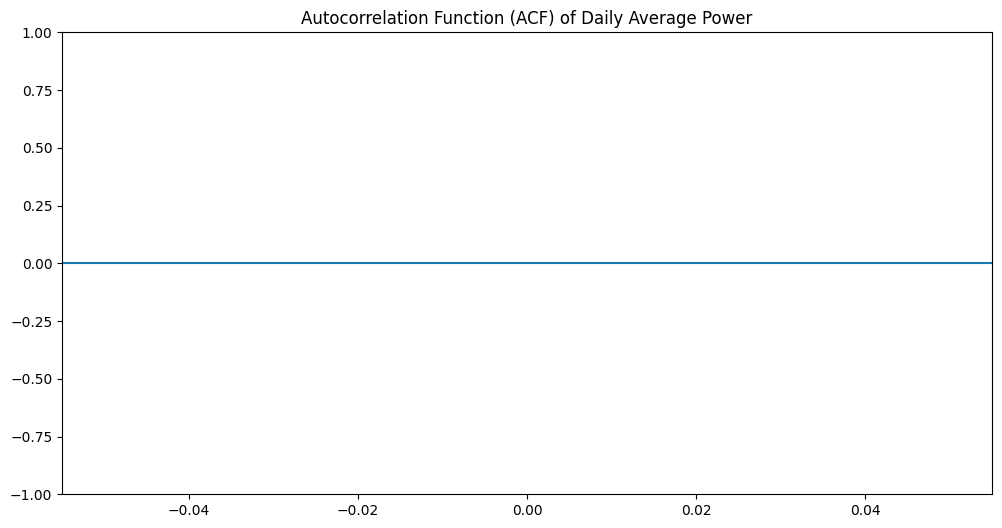

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Assuming 'df' is your DataFrame with 'time' (datetime) and 'power' columns
# If your data is daily averages, it's already in the right format.

# Plot ACF of power
plt.figure(figsize=(12, 6))
plot_acf(df_hourly['power'], lags=24, ax=plt.gca())  # Adjust 'lags' as needed
plt.title('Autocorrelation Function (ACF) of Daily Average Power')
plt.show()

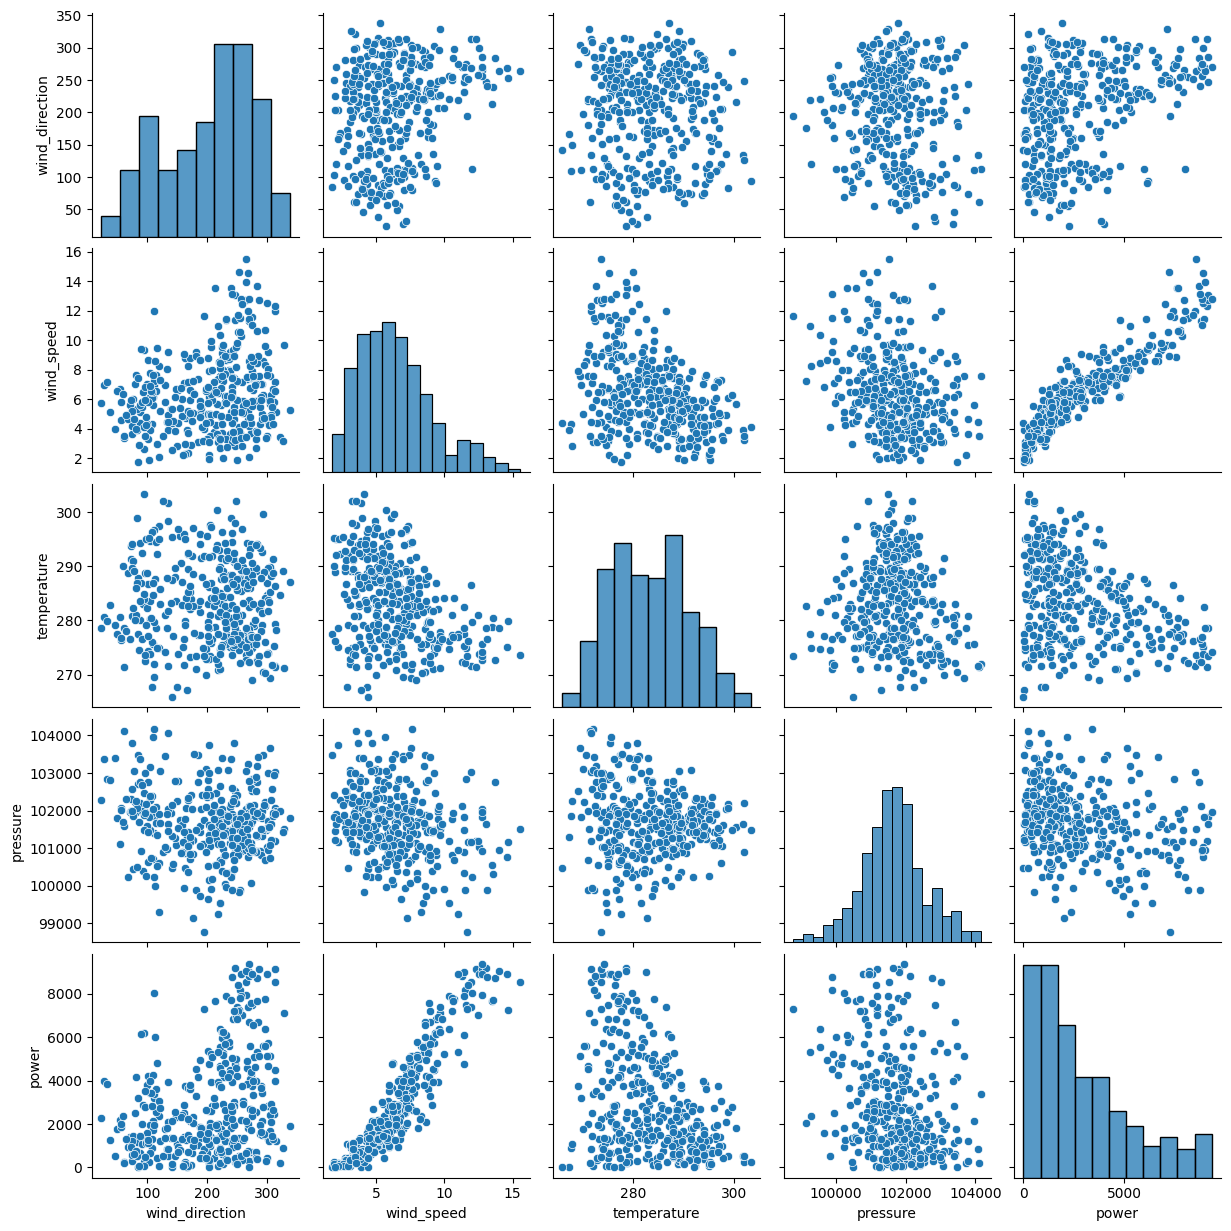

In [98]:
sns.pairplot(df_hourly)
plt.show()

Right, let's tackle this task using the pair plot you've provided and the instructions.

1. Reading and Understanding the Data (Visual Analysis)
Pair Plot Insights:
Power vs. Wind Speed: A strong positive correlation is evident. As wind speed increases, power generation increases significantly. This is expected and crucial for the model.
Power vs. Temperature: A slight negative correlation is visible. As temperature increases, power generation tends to decrease slightly.
Power vs. Pressure: A weak negative correlation is observed.
Power vs. Wind Direction: A moderate correlation.
Distributions: The histograms along the diagonal show the distribution of each variable. Wind speed and power are skewed, while pressure and temperature are more normally distributed.



2. Examining and Preparing the Data (Based on Visuals)
Potential Issues:
Non-Linear Relationships: Some of the relationships (especially power vs. wind speed) appear non-linear. This suggests that linear models might not capture the full complexity of the data.
Skewed Distributions: The skewed distributions of wind speed and power might affect model performance. Transformations (e.g., logarithmic) could be considered.
Outliers: Further analysis should be done to check the outliers.
Time Dependency: The pair plot doesn't show time dependencies. We need to use time series analysis techniques (ACF, PACF, etc.) to investigate this.
Preparation Steps (to be done in code):
Handle Missing Values: Check for and handle any missing values.
Feature Engineering:
Create lagged features of wind speed and power to capture temporal dependencies.
Consider creating interaction terms (e.g., wind speed * temperature).
Extract time based features. (hour, day, month)
Transformations: Apply transformations (e.g., logarithmic) to skewed variables if necessary.
Outlier Detection and Handling: Identify and handle outliers.
Time Series Analysis: Perform ACF and PACF analysis to investigate time dependencies.


. Importance of Wind Speed:

Decision: Wind speed is the most critical predictor and should be given the highest priority in your model.
Action:
Investigate the relationship between wind speed and power in more detail.
Ensure that your model accurately captures this strong positive correlation.
Consider feature engineering related to wind speed, such as lagged wind speed values or rolling statistics.
2. Handling Non-Linearity:

Decision: The relationship between wind speed and power appears non-linear.
Action:
Explore non-linear models (e.g., Random Forest, Gradient Boosting, Neural Networks) that can capture this relationship.
Consider applying transformations (e.g., logarithmic) to wind speed or power to linearize the relationship if using linear models.
3. Temperature and Pressure Effects:

Decision: Temperature and pressure have a weaker but still noticeable influence on power generation.
Action:
Include temperature and pressure as predictors in your model.
Investigate potential interaction effects between temperature, pressure, and wind speed.
Consider creating polynomial features.
Since the correlation is low, be aware that those parameters might add noise to the model, and evaluate if the model is improved when they are included.
4. Wind Direction Influence:

Decision: Wind direction has a moderate correlation with power generation.
Action:
Include wind direction as a predictor.
Explore how wind direction interacts with wind speed to affect power output.
If the wind direction is in degrees, consider transforming it using sin and cos, to transform the circular data into linear data.
5. Handling Skewed Distributions:

Decision: Wind speed and power have skewed distributions.
Action:
Consider applying transformations (e.g., logarithmic, square root) to normalize the distributions.
Use models that are robust to skewed data (e.g., tree-based models).
6. Outlier Management:

Decision: The pair plot can visually suggest potential outliers.
Action:
Perform formal outlier detection techniques (e.g., z-score, IQR) to identify and handle outliers.
Decide whether to remove, replace, or transform outliers based on their impact on the model.
7. Model Selection:

Decision: The nature of the relationships suggests that both linear and non-linear models could be considered.
Action:
Experiment with different models (e.g., Linear Regression, Random Forest, Gradient Boosting, LSTM).
Evaluate model performance using appropriate metrics (e.g., MAE, RMSE).
8. Feature Engineering:

Decision: Feature engineering is crucial to improve model performance.
Action:
Create lagged features of wind speed and power to capture temporal dependencies.
Calculate rolling statistics (e.g., moving average) of wind speed.
Extract time-based features (e.g., hour, day, month).
Create interaction features.
9. Time Series Analysis:

Decision: The pair plot doesn't reveal time dependencies.
Action:
Perform time series analysis (ACF, PACF, decomposition) to investigate temporal patterns.
Use time series models (e.g., ARIMA, SARIMA, Prophet) or handle time dependencies in other models.

In [73]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'df' is your DataFrame with 'time' (datetime) and 'power' columns
# Set 'time' as the index if it's not already
df_hourly.set_index('time', inplace=True)

# Time Series Decomposition of power
plt.figure(figsize=(12, 8))
decomposition = seasonal_decompose(df_hourly['power'], model='additive', period=30)  # Adjust 'period' based on your data's seasonality (e.g., 30 for monthly seasonality)
decomposition.plot()
plt.suptitle('Time Series Decomposition of Daily Average Power')
plt.show()

ValueError: This function does not handle missing values

<Figure size 1200x800 with 0 Axes>

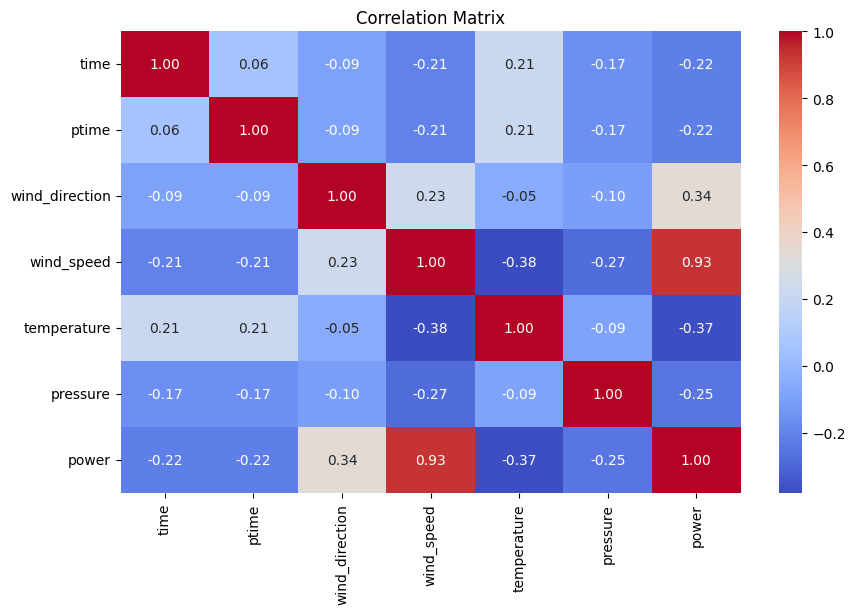

                    time     ptime  wind_direction  wind_speed  temperature  \
time            1.000000  0.057851       -0.094526   -0.206690     0.211815   
ptime           0.057851  1.000000       -0.094502   -0.206662     0.211828   
wind_direction -0.094526 -0.094502        1.000000    0.232450    -0.054456   
wind_speed     -0.206690 -0.206662        0.232450    1.000000    -0.381926   
temperature     0.211815  0.211828       -0.054456   -0.381926     1.000000   
pressure       -0.165187 -0.165191       -0.104728   -0.274823    -0.085363   
power          -0.219786 -0.219756        0.336291    0.932331    -0.372147   

                pressure     power  
time           -0.165187 -0.219786  
ptime          -0.165191 -0.219756  
wind_direction -0.104728  0.336291  
wind_speed     -0.274823  0.932331  
temperature    -0.085363 -0.372147  
pressure        1.000000 -0.248482  
power          -0.248482  1.000000  


In [121]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_hourly.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
print(df_hourly.corr())

I can see the graph showing "Daily Average Power Generation Over Time" for one year at hourly intervals. Based on this graph and the task description, here's my analysis:
The power generation data shows significant variability with values ranging from 0 kW to peaks of approximately 9000 kW. This is typical for wind power generation, which is highly dependent on meteorological conditions.
From examining the graph, I notice several key characteristics:

High volatility: There are rapid fluctuations in power generation, which reflects the intermittent nature of wind resources.
Some periods of zero or near-zero generation: These likely correspond to times when wind speeds were below the cut-in speed of the turbines or above their cut-out speed.
Seasonal patterns: While not immediately obvious without date labels, there appear to be some periods with consistently higher generation than others, which might indicate seasonal variations.
Data completeness: The time series appears to be complete without obvious gaps, spanning approximately 8760 hours (365 days × 24 hours).

Regarding Task 1, to create a power forecast model with the highest possible accuracy, I would suggest the following approach:

Data preprocessing:

Check for missing values in both meteorological parameters and power generation data
Normalize or standardize features as needed
Create lag features to capture temporal dependencies


Feature engineering:

Include various meteorological parameters (wind speed, direction, temperature, pressure, etc.)
Create derived features like wind direction components (sine/cosine)
Consider time-based features (hour of day, day of week, month, season)


Potential modeling approaches:

Gradient Boosting models (XGBoost, LightGBM)
Neural networks (LSTM, GRU) for capturing temporal dependencies
Ensemble methods combining multiple models


Potential challenges I observe:

Wind power generation is non-linear with respect to wind speed (cubic relationship)
Power generation is bounded (0 to maximum capacity)
Temporal dependencies and autocorrelation in the data
Potential wake effects between turbines depending on wind direction
Possible curtailment events or maintenance periods that would affect generation

In [ ]:
# Datentypen prüfen und ggf. anpassen
df['timestamp_for'] = pd.to_datetime(df.iloc[:, 0])
df['timestamp_forecast'] = pd.to_datetime(df.iloc[:, 1])

In [ ]:
# Spaltennamen anpassen
df.columns = ['timestamp_for_str', 'timestamp_forecast_str', 'wind_direction', 'wind_speed', 'temperature', 'pressure', 'power', 'timestamp_for', 'timestamp_forecast']


In [ ]:
# Daten untersuchen
print(df.head())
print(df.info())
print(df.describe())

In [ ]:
# Zeitliche Analyse
df['hour'] = df['timestamp_for'].dt.hour
df['month'] = df['timestamp_for'].dt.month
df['dayofweek'] = df['timestamp_for'].dt.dayofweek



In [ ]:
# Plots
plt.figure(figsize=(12, 6))
sns.lineplot(x='timestamp_for', y='power', data=df)
plt.title('Gemessene Leistung über Zeit')
plt.xlabel('Zeitpunkt')
plt.ylabel('Leistung (kW)')
plt.show()



In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='power', data=df)
plt.title('Leistung nach Stunden')
plt.xlabel('Stunde')
plt.ylabel('Leistung (kW)')
plt.show()



Analysis of the Boxplot:

Distinct Diurnal Pattern: The plot reveals a clear daily pattern in power generation. We see a lower power output during the night and early morning hours (roughly 0-7) and a higher output during the day (roughly 8-23). This indicates a strong influence of time of day on power generation, likely due to wind patterns or potentially solar influences if the data is mixed.
Peak Power in the Afternoon/Evening: The highest median power output seems to occur in the afternoon and early evening (roughly 14-20). This suggests that wind speeds are typically higher during these hours.
High Variability During Daytime: The boxes and whiskers during the daytime hours are relatively tall, indicating significant variability in power generation. This implies that factors other than just the time of day influence power output.
Outliers: There are some outliers, particularly during the daytime hours, which could represent unusual events or data errors.
Suggestions for Improving the Time Series Power Forecasting Model:

Explicitly Model the Diurnal Pattern:

Recommendation: "The model must explicitly capture the daily pattern. Use time-of-day features like hour of the day as categorical or cyclical (sine/cosine) features. Consider using Fourier terms to represent the daily cycle."
Focus on the Transition Periods:

Recommendation: "Pay special attention to the transition periods between low and high power output (around 7-8 and 20-21). These periods might be more challenging to model due to rapid changes in power generation. Consider using features that capture the rate of change of power or wind speed."
Address High Variability During the Day:

Recommendation: "The high variability during the day suggests that other factors beyond just the hour of the day influence power generation. Incorporate features like wind speed, wind direction, temperature, and pressure. Consider using models that can handle non-constant variance (heteroscedasticity)."
Investigate and Handle Outliers:

Recommendation: "Investigate the causes of the outliers, particularly during the daytime. Determine if they represent genuine extreme events or data errors. If they are genuine, consider using robust modeling techniques or create separate models for outlier scenarios. If they are errors, consider data cleaning or imputation."
Use Lagged Features and Rolling Statistics:

Recommendation: "Incorporate lagged values of power and other relevant features to capture temporal dependencies. Consider using rolling statistics (e.g., rolling mean, standard deviation) to smooth out fluctuations and capture trends within each hour."
Consider External Factors:

Recommendation: "Beyond just the hour of the day, incorporate external factors like weather forecasts (wind speed, wind direction, temperature, pressure), day of the week, and holiday information. These can help explain the variability within each hour."
Model Selection:

Recommendation: "Use models that can capture both seasonality and non-linear relationships, such as:
LSTM (Long Short-Term Memory) or GRU (Gated Recurrent Unit) neural networks
Tree-based models (Random Forests, Gradient Boosting) with appropriate feature engineering
SARIMA (Seasonal Autoregressive Integrated Moving Average) or Prophet (if seasonality is very regular)"
Short-Term Forecasting Focus:

Recommendation: "The plot suggests a strong short-term (hourly) pattern. Focus on building a model that excels at short-term forecasting. Consider using a sliding window approach with a short forecast horizon."
Key takeaway: The dominant feature in this plot is the strong diurnal pattern. The model needs to effectively capture this pattern while also accounting for the variability and outliers observed in the data.

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='power', data=df)
plt.title('Leistung nach Monaten')
plt.xlabel('Monat')
plt.ylabel('Leistung (kW)')
plt.show()



Focus on Interpreting the Correlations and Suggesting Actionable Insights:

Highlight the Strong Relationship Between Wind Speed and Power:

Insight: "The strongest positive correlation is between wind speed and power (0.81). This indicates that wind speed is the most significant predictor for power generation."
Recommendation: "Ensure the model heavily leverages wind speed. Feature engineering should focus on creating relevant wind speed-derived features (e.g., squared wind speed, moving averages, lagged values). The model should be sensitive to changes in wind speed."
Discuss the Moderate Relationship with Wind Direction:

Insight: "Wind direction has a moderate positive correlation with power (0.25). This suggests it plays a role, but not as strong as wind speed."
Recommendation: "Consider transforming wind direction into sine and cosine components for better model representation. Investigate how changes in wind direction affect power and create relevant features. Evaluate the model's sensitivity to wind direction and adjust accordingly."
Address the Weak Correlations with Temperature and Pressure:

Insight: "Temperature and pressure show weak negative correlations with power (-0.29 and -0.21, respectively). This suggests they have a limited direct impact."
Recommendation: "These variables might still be useful as they could capture seasonal effects or influence air density. Explore creating interaction terms with wind speed. Use them as inputs, but consider regularization if using linear models to prevent overfitting on these potentially less informative features. Don't rely heavily on these variables alone."
Point Out Potential Non-Linear Relationships:

Insight: "While the correlation matrix shows linear relationships, the relationship between wind speed and power is likely non-linear (often closer to a cubic relationship). The correlation coefficient only captures linear dependencies."
Recommendation: "Advise the modeler to use models that can capture non-linear relationships, such as Random Forests, Gradient Boosting Machines, or Neural Networks. Emphasize the importance of feature engineering to capture these non-linearities."
Suggest Time Series Considerations:

Insight: "This data is likely time-series data. The correlations don't show the temporal dependencies."
Recommendation: "Stress the need for time-series-specific techniques. Lagged values of power and other features are crucial. Rolling statistics and decomposition of the time series into trend, seasonality, and residuals should be explored. Proper time series cross-validation is essential."
Highlight the Importance of External Factors:

Insight: "Correlations only consider the provided variables. Other factors might influence power generation."
Recommendation: "Suggest incorporating external factors like time of day, day of the week, month, weather forecasts, and information about maintenance or outages. These could significantly improve the model's accuracy."
In essence, your role is to translate the correlation coefficients into actionable insights for the modeler. You should guide them on:

Which features to prioritize.
How to transform and engineer features.
What type of models might be suitable.
What time series considerations are crucial.
What external factors to explore.
By providing these insights, you're helping them build a better, more informed model, even if you're not directly involved in the coding process.

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='dayofweek', y='power', data=df)
plt.title('Leistung nach Wochentagen')
plt.xlabel('Wochentag')
plt.ylabel('Leistung (kW)')
plt.show()



In [ ]:
# Korrelationen
correlation_matrix = df[['wind_direction', 'wind_speed', 'temperature', 'pressure', 'power']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korrelationsmatrix')
plt.show()

In [ ]:
# Korrelationen
correlation_matrix = df[['wind_direction', 'wind_speed', 'temperature', 'pressure', 'power']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korrelationsmatrix')
plt.show()

In [ ]:
# Weitere Daten
# Zusätzliche Daten könnten sein:
# - Geographische Koordinaten des Windparks
# - Topographische Daten (z.B. Höhe, Rauigkeit)
# - Wetterdaten von umliegenden Stationen
# - Daten zu Wartungsarbeiten oder Ausfällen